# ***ASSIGNMENT - 7***

In [1]:
# Importing Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set(style="whitegrid")

## Loading the Dataset

In [2]:
df = pd.read_csv("ToyotaCorolla - MLR.csv")

print("Dataset loaded successfully!\n")
print(df.head())
print("\nDataset Info:")
df.info()

Dataset loaded successfully!

   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-

## EXPLORATORY DATA ANALYSIS (EDA)


DESCRIPTION STATISTICS:
              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
m

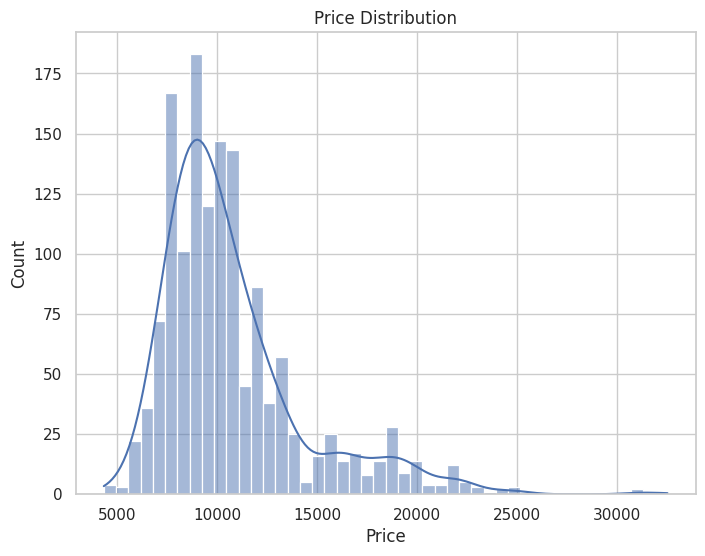

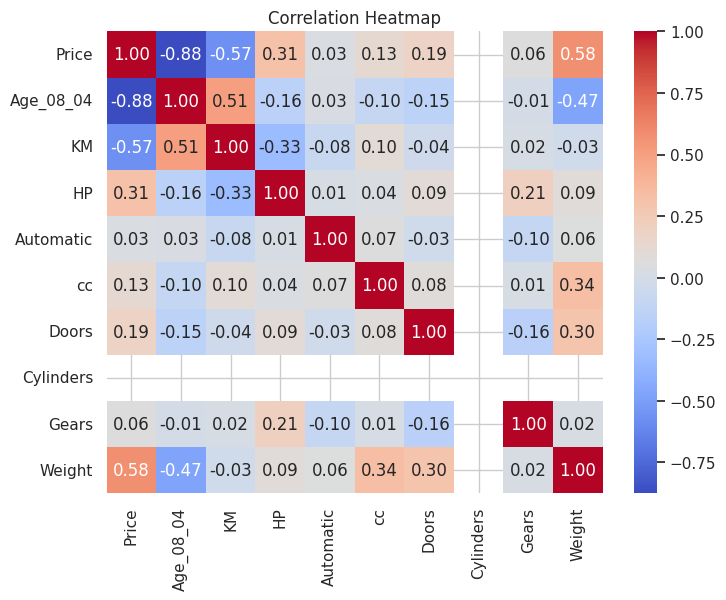

In [3]:
print("\nDESCRIPTION STATISTICS:")
print(df.describe())

# ---- PRICE DISTRIBUTION ----
plt.figure(figsize=(8,6))
sns.histplot(df["Price"], kde=True)
plt.title("Price Distribution")
plt.show()

# ---- CORRELATION HEATMAP (NUMERIC ONLY) ----
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## DATA PRE-PROCESSING

In [4]:
# Convert categorical 'FuelType' using dummy variables
df = pd.get_dummies(df, columns=["Fuel_Type"], drop_first=True)

# Split into features and label
X = df.drop("Price", axis=1)
Y = df["Price"]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nPre-processing completed!")


Pre-processing completed!


## TRAIN-TEST SPLIT (80/20)

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split( X_scaled, Y, test_size=0.2, random_state=42)

print("Train-test split completed!")
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

Train-test split completed!
Training samples: 1148, Testing samples: 288


## BUILD MULTIPLE MODELS

In [6]:
# Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred_lr = lr.predict(X_test)

# Model 2: Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, Y_train)
Y_pred_ridge = ridge.predict(X_test)

# Model 3: Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, Y_train)
Y_pred_lasso = lasso.predict(X_test)

print("Models trained successfully!")

Models trained successfully!


## EVALUATION FUNCTION

In [7]:
def evaluate(model_name, Y_true, Y_pred):
    print(f"{model_name} Evaluation")
    print("MAE :", round(mean_absolute_error(Y_true, Y_pred), 2))
    print("MSE :", round(mean_squared_error(Y_true, Y_pred), 2))
    print("RMSE:", round(np.sqrt(mean_squared_error(Y_true, Y_pred)), 2))
    print("R²  :", round(r2_score(Y_true, Y_pred), 4))
    print("\n")
# Evaluate all three models
evaluate("Linear Regression", Y_test, Y_pred_lr)
evaluate("Ridge Regression", Y_test, Y_pred_ridge)
evaluate("Lasso Regression", Y_test, Y_pred_lasso)

Linear Regression Evaluation
MAE : 990.89
MSE : 2203043.82
RMSE: 1484.27
R²  : 0.8349


Ridge Regression Evaluation
MAE : 990.87
MSE : 2200682.01
RMSE: 1483.47
R²  : 0.8351


Lasso Regression Evaluation
MAE : 990.9
MSE : 2202734.65
RMSE: 1484.16
R²  : 0.8349




## INTERPRETING COEFFICIENTS

In [8]:
coef_df = pd.DataFrame({"Feature": X.columns, "Coefficient": lr.coef_})
print("LINEAR REGRESSION COEFFICIENTS:\n")
print(coef_df.sort_values(by="Coefficient", ascending=False))

LINEAR REGRESSION COEFFICIENTS:

             Feature   Coefficient
8             Weight  1.362139e+03
10  Fuel_Type_Petrol  4.451027e+02
2                 HP  2.102533e+02
7              Gears  1.039463e+02
3          Automatic  3.413608e+01
6          Cylinders  2.842171e-13
4                 cc -1.288507e+01
9   Fuel_Type_Diesel -2.127088e+01
5              Doors -5.743684e+01
1                 KM -6.085706e+02
0          Age_08_04 -2.246662e+03


## ***Interview Questions***

### 1. Normalization and Standardiazation:
Normalization and standardization are data preprocessing techniques to scale features to a common range, crucial for machine learning models. Normalization called as Min-Max scalling, rescales data to a fixed range like 0 to 1, while Standardization (Z-score) transforms data to have a mean of 0 and standard deviation of 1, improving model performance by ensuring features contribute equally and preventing dominance by features with larger scales

**Normalisation** is useful when the distribution isn't known or not normal, common for algorithms like k-NN and neural networks that benefit from bounded inputs.

**Standardisation** is used when algorithms assume normally distributed data like linear regression, SVM, PCA or when features have vastly different scales.

### 2. Techniques that are used to address multicollinearity in multiple linear regression:

To address multicollinearity in multiple linear regression, you can remove highly correlated predictors, use regularization methods like Ridge or Lasso regression to penalize large coefficients, apply Principal Component Analysis (PCA) to create uncorrelated components, or increase your sample size. Other options include combining correlated variables or using specialized techniques like Partial Least Squares Regression (PLSR) to handle the issue while retaining all predictors.